In [1]:
import os
import cv2
import urllib
import numpy as np
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from layers import *
from activations import *
from metrics import *
from optimizers import *
from model import Model

In [4]:
URL = "https://nnfs.io/datasets/fashion_mnist_images.zip"
FILE = "fashion_mnist_images.zip"
FOLDER = "fashion_mnist_images"

In [3]:
if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

In [6]:
print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall(FOLDER)

Unzipping images...


In [2]:
def load_mnist_dataset(dataset, path):
    labels = os.listdir(os.path.join(path, dataset))
    X = []
    y = []
    
    for label in labels:
        for file in os.listdir(os.path.join(path, dataset, label)):
            image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)            
            X.append(image)
            y.append(label)
    
    return np.array(X), np.array(y).astype('uint8')

def create_data_mnist(path):
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    return X, y, X_test, y_test

In [3]:
X, y, X_test, y_test = create_data_mnist('fashion_mnist_images')

In [4]:
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

In [5]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


In [6]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

Class: 7


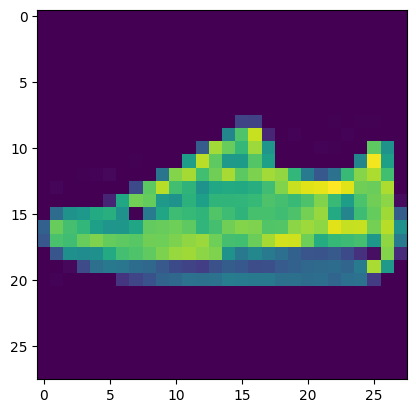

In [7]:
c = 7

print("Class:", y[c])
plt.imshow((X[c].reshape(28, 28)))
plt.show()

In [8]:
model = Model()
# Add layers
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 10))
model.add(Activation_Softmax())

model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=1e-3),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X,
    y, 
    validation_data=(X_test, y_test),
    epochs=10, 
    batch_size=128, 
    print_every=100
)

epoch: 1
    step: 0, acc: 0.148, loss: 3.430 (data_loss: 3.430,reg_loss: 0.000), lr: 0.001
    step: 100, acc: 0.789, loss: 0.643 (data_loss: 0.643,reg_loss: 0.000), lr: 0.0009090909090909091


KeyboardInterrupt: 

In [9]:
model.evaluate(X, y)

Evaluation, acc: 0.815, loss: 0.511


In [10]:
model.get_parameters()

[(array([[ 0.23455766, -0.08944752, -0.08549328, ...,  0.02724564,
           0.20125451,  0.00233569],
         [ 0.17365267,  0.19592926, -0.02080462, ...,  0.12943966,
           0.05449581,  0.01410693],
         [-0.01733388, -0.00662533, -0.16831924, ...,  0.02963583,
           0.0587456 , -0.0809673 ],
         ...,
         [ 0.01392181,  0.0479036 , -0.11876695, ..., -0.19030514,
           0.14043264, -0.22342093],
         [ 0.06880933, -0.02714239,  0.02616552, ...,  0.09168021,
           0.06829319, -0.08214921],
         [ 0.07056453, -0.03003045, -0.14237216, ..., -0.00624369,
           0.02237638, -0.00228123]]),
  array([[-5.77914844e-03, -8.77775079e-03, -5.89193918e-03,
          -3.13283067e-04,  1.46683060e-02, -1.70714978e-02,
          -7.24187424e-03, -8.64402950e-03, -1.14378336e-02,
          -8.30145891e-03, -1.52137741e-03, -3.76192999e-03,
           3.68487502e-03, -3.33744440e-03, -4.36286109e-03,
          -4.54555368e-04, -1.07647194e-02,  1.55560731

In [ ]:
model.save("model.m")
model = Model.load("model.m")